__Libraries__

In [54]:
import os
import shutil
import random
from collections import Counter
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

__Convolutional Neural Network Setup (MobileNet)__

In [55]:
file_location = os.getcwd()

train_path = file_location+"/data/train"
valid_path = file_location+"/data/valid"
test_path = file_location+"/data/test"
test_TI_SD1_path = file_location+"/data/TISD1"
test_TI_SD2_path = file_location+"/data/TISD2"
test_TI_SD3_path = file_location+"/data/TISD3"
test_TI_SD4_path = file_location+"/data/TISD4"

In [56]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD1_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD1_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD2_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD2_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD3_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD3_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD4_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD4_path,target_size=(224,224), batch_size=10, shuffle=False)

Found 330 images belonging to 5 classes.
Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [25]:
mobile = tf.keras.applications.mobilenet.MobileNet()
#mobile.summary()

In [26]:
x = mobile.layers[-1].output
output = Dense(units=5, activation="softmax")(x)

In [27]:
model = Model(inputs=mobile.input, outputs=output)

In [28]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

__Train model__

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=50, verbose = 2)

Epoch 1/50
33/33 - 31s - loss: 1.6028 - accuracy: 0.3788 - val_loss: 1.6100 - val_accuracy: 0.2533 - 31s/epoch - 942ms/step
Epoch 2/50
33/33 - 19s - loss: 1.5710 - accuracy: 0.7242 - val_loss: 1.5976 - val_accuracy: 0.3200 - 19s/epoch - 584ms/step
Epoch 3/50
33/33 - 22s - loss: 1.5512 - accuracy: 0.8212 - val_loss: 1.5775 - val_accuracy: 0.4000 - 22s/epoch - 657ms/step
Epoch 4/50
33/33 - 19s - loss: 1.5401 - accuracy: 0.8485 - val_loss: 1.5711 - val_accuracy: 0.5333 - 19s/epoch - 586ms/step
Epoch 5/50
33/33 - 20s - loss: 1.5323 - accuracy: 0.8909 - val_loss: 1.5606 - val_accuracy: 0.5867 - 20s/epoch - 593ms/step
Epoch 6/50
33/33 - 19s - loss: 1.5235 - accuracy: 0.9030 - val_loss: 1.5602 - val_accuracy: 0.5733 - 19s/epoch - 585ms/step
Epoch 7/50
33/33 - 17s - loss: 1.5194 - accuracy: 0.9091 - val_loss: 1.5509 - val_accuracy: 0.6133 - 17s/epoch - 523ms/step
Epoch 8/50
33/33 - 28s - loss: 1.5141 - accuracy: 0.9121 - val_loss: 1.5507 - val_accuracy: 0.6267 - 28s/epoch - 847ms/step
Epoch 9/

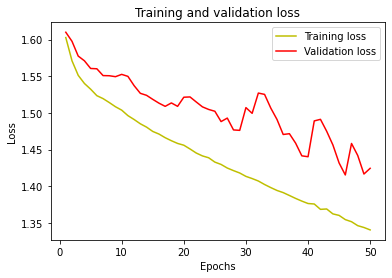

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

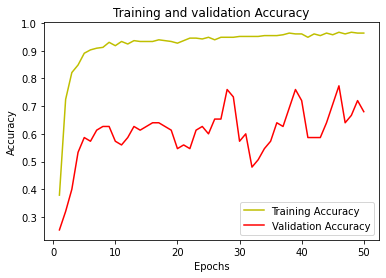

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

__Predictions for Test Data__

In [45]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [46]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose = 0)

Confusion Matrix without normalization
[[5 0 0 0 0]
 [1 1 0 3 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


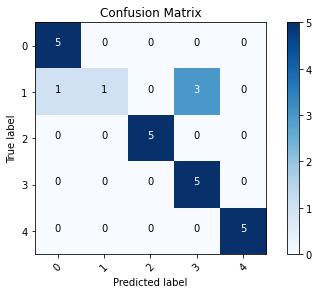

In [47]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#test_batches.class_indices
cm_plot_labels = ["0","1","2","3","4"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

__Predictions for Textual Inversion Trained Stable Diffusion 2 generated data__

In [57]:
#TISD1 were images created by Stable Diffusion with prompt: "painting in the style of <Cezanne>"
TISD1_labels = TISD1_batches.classes

In [58]:
predictions = model.predict(x=TISD1_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({4: 100})

In [59]:
predictions

array([[0.18048276, 0.16964364, 0.18202932, 0.18442175, 0.28342256],
       [0.18052939, 0.1696456 , 0.18222396, 0.18443117, 0.2831698 ],
       [0.18059397, 0.16965474, 0.18249115, 0.1844462 , 0.28281394],
       [0.18050821, 0.16964805, 0.18213238, 0.1844281 , 0.28328326],
       [0.18076709, 0.16968042, 0.18320425, 0.18448466, 0.28186363],
       [0.18063779, 0.16966158, 0.18267246, 0.18445554, 0.28257266],
       [0.18055381, 0.16965012, 0.18232562, 0.18443705, 0.28303343],
       [0.18052673, 0.16964641, 0.18221638, 0.18443044, 0.28317994],
       [0.1804824 , 0.16964045, 0.18203203, 0.18442103, 0.2834241 ],
       [0.18047673, 0.1696385 , 0.18201247, 0.18441889, 0.28345343],
       [0.18056059, 0.1696527 , 0.18234807, 0.18443982, 0.2829989 ],
       [0.18049031, 0.16963975, 0.18206795, 0.18442191, 0.28338006],
       [0.1805007 , 0.16964072, 0.18211247, 0.18442391, 0.28332224],
       [0.18053046, 0.16964653, 0.1822305 , 0.18443173, 0.28316072],
       [0.18053702, 0.16964594, 0.

In [60]:
#TISD2 were images created by Stable Diffusion with prompt: "landscape painting in the style of <Cezanne>"
TISD2_labels = TISD2_batches.classes

In [61]:
predictions = model.predict(x=TISD2_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({4: 100})

In [62]:
predictions

array([[0.18056248, 0.16979858, 0.18220125, 0.18448369, 0.28295404],
       [0.18060908, 0.16985178, 0.18233572, 0.18451029, 0.28269315],
       [0.1804843 , 0.16966516, 0.18199758, 0.18443193, 0.28342107],
       [0.18165988, 0.17223592, 0.18457933, 0.1853655 , 0.2761594 ],
       [0.18049939, 0.16964206, 0.18210535, 0.18442398, 0.28332916],
       [0.18052597, 0.1696439 , 0.18221632, 0.1844295 , 0.28318435],
       [0.18047564, 0.16963583, 0.18201312, 0.18441743, 0.28345802],
       [0.1805337 , 0.1696815 , 0.18220603, 0.18444316, 0.28313565],
       [0.18054019, 0.16979216, 0.18211655, 0.18447608, 0.28307506],
       [0.1805652 , 0.16966952, 0.18234524, 0.18444636, 0.2829737 ],
       [0.18047027, 0.16964294, 0.1819776 , 0.18441947, 0.2834897 ],
       [0.18047202, 0.16965324, 0.18197235, 0.18442313, 0.2834793 ],
       [0.18059786, 0.16965593, 0.18250619, 0.1844468 , 0.28279325],
       [0.18053095, 0.16968854, 0.18217878, 0.1844448 , 0.28315693],
       [0.18046387, 0.1696379 , 0.

In [63]:
#TISD3 were images created by Stable Diffusion with prompt: "painting of the Provence in the style of <Cézanne>"
TISD3_labels = TISD3_batches.classes

In [64]:
predictions = model.predict(x=TISD3_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({4: 100})

In [65]:
predictions

array([[0.1807768 , 0.16969083, 0.18322682, 0.18449101, 0.28181452],
       [0.18052487, 0.16964869, 0.18219529, 0.18443184, 0.28319937],
       [0.18072546, 0.16967851, 0.18302085, 0.18447773, 0.28209746],
       [0.18052126, 0.16964315, 0.18219653, 0.18442853, 0.28321055],
       [0.18049343, 0.16965656, 0.1820598 , 0.18442824, 0.28336194],
       [0.18049863, 0.1696398 , 0.18210433, 0.18442339, 0.28333387],
       [0.18090615, 0.16970143, 0.18377627, 0.18451627, 0.28109992],
       [0.18053119, 0.16964614, 0.18223336, 0.18443164, 0.2831577 ],
       [0.18068066, 0.16990647, 0.18255706, 0.18454331, 0.28231254],
       [0.18051225, 0.16974612, 0.18204726, 0.18445802, 0.28323632],
       [0.18048146, 0.16963702, 0.1820345 , 0.18441924, 0.28342777],
       [0.18047257, 0.16963682, 0.18199503, 0.18441793, 0.28347766],
       [0.18112059, 0.16974275, 0.18465333, 0.18456694, 0.2799164 ],
       [0.18062823, 0.16966109, 0.1826305 , 0.18445396, 0.28262624],
       [0.18056977, 0.1696503 , 0.

In [66]:
#TISD4 were images created by Stable Diffusion with prompt: "painting of Mont Saint Victoire in the style of <Cézanne>"
TISD4_labels = TISD4_batches.classes

In [67]:
predictions = model.predict(x=TISD4_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({4: 96, 2: 4})

In [68]:
predictions

array([[0.1805729 , 0.1696529 , 0.18239555, 0.18444294, 0.2829358 ],
       [0.18055297, 0.16964814, 0.18232612, 0.18443593, 0.2830369 ],
       [0.19037324, 0.1689061 , 0.23684451, 0.18442148, 0.21945468],
       [0.18316542, 0.16993596, 0.19369027, 0.18492487, 0.26828355],
       [0.18048985, 0.1696466 , 0.18205473, 0.18442495, 0.28338385],
       [0.18048412, 0.1696439 , 0.18202691, 0.18442504, 0.28342003],
       [0.18065849, 0.1696684 , 0.18274255, 0.18446606, 0.28246444],
       [0.18050124, 0.1696413 , 0.1821102 , 0.18442504, 0.28332227],
       [0.18365693, 0.16996278, 0.19599973, 0.18498947, 0.26539114],
       [0.18049736, 0.16963962, 0.18209939, 0.18442294, 0.2833407 ],
       [0.18152985, 0.16978675, 0.1863942 , 0.18465051, 0.27763858],
       [0.18116611, 0.16973911, 0.18485624, 0.18457378, 0.27966467],
       [0.18078548, 0.1696893 , 0.18326293, 0.184495  , 0.28176734],
       [0.18052958, 0.16964644, 0.182224  , 0.18443291, 0.28316703],
       [0.18089451, 0.16970463, 0.